## Face Recognization Using SVM

# Dataset

In [ ]:
from sklearn.datasets import fetch_lfw_people #dataset fetching
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

# Dataset Visuals

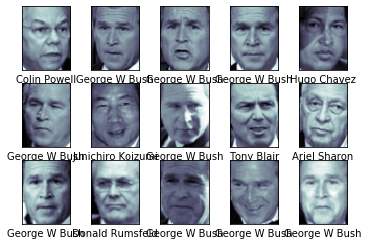

In [90]:
import numpy as np
import matplotlib as plt
from pylab import *

y , ax = plt.subplots(3,5) #subplot is for grid making i.e 3 rows 5 coloumn 
#lets put images in this grid  with names

for i,j in enumerate(ax.flat):
    j.imshow(faces.images[i] , cmap='bone')
    j.set(xticks=[],yticks=[],
        xlabel = faces.target_names[faces.target[i]])

    



# Feature Extraction using Principal Component Analysis(PCA) 

In [95]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = PCA(n_components=153,whiten=True)


## Building SVC model using pipeline  

In [96]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',class_weight='balanced')

from sklearn.pipeline import make_pipeline

model = make_pipeline(pca,svc) #making model using SVC(classifier ) and PCA (features)

## Dataset Split for training and testing 

In [97]:
from sklearn.model_selection import train_test_split #in earlier version of Sklearn the library train_test_split  is in cross_validation
Xtrain , Xtest , ytrain , ytest = train_test_split(faces.data,faces.target) #Xtest is the image data(pixel values) and ytest(lables)

## Let's Find the Best margin for SVC classifier ( svc__C and svc__gamma

In [116]:
from sklearn.model_selection import GridSearchCV #in earlier version of Sklearn the library GridSearchCV  is in cross_validation
param_grid ={'svc__C':[1,5,10,50],'svc__gamma':[0.0001,0.0005,0.001,0.005]} # there are two underscore in svc__C and svc__gamma
grid = GridSearchCV(model ,param_grid )
%time grid.fit(Xtrain,ytrain) 

print(grid.best_params_)


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 26.8 s
{'svc__C': 10, 'svc__gamma': 0.005}


In [117]:
model  = grid.best_estimator_
yfit = model.predict(Xtest)

## Final result visuals 

Text(0.5, 0.98, 'values')

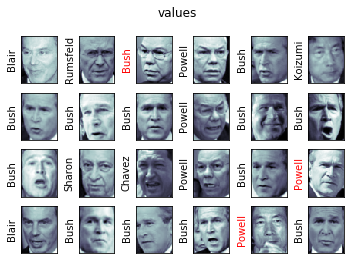

In [121]:
x,y = plt.subplots(4,6)
for i , j in enumerate(y.flat):
    j.imshow(Xtest[i].reshape(62,47),cmap="bone")
    j.set(xticks=[],yticks=[])
    j.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                                                  color = 'black' if yfit[i] == ytest[i] else 'red')
x.suptitle("values")

## Evalution of our predicitions ( Model Evaluation )

In [122]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.94      0.84      0.89        19
     Colin Powell       0.85      0.87      0.86        63
  Donald Rumsfeld       0.92      0.81      0.86        27
    George W Bush       0.80      0.96      0.88       131
Gerhard Schroeder       0.90      0.86      0.88        22
      Hugo Chavez       1.00      0.76      0.87        17
Junichiro Koizumi       1.00      0.72      0.84        18
       Tony Blair       0.93      0.62      0.75        40

         accuracy                           0.86       337
        macro avg       0.92      0.81      0.85       337
     weighted avg       0.87      0.86      0.85       337



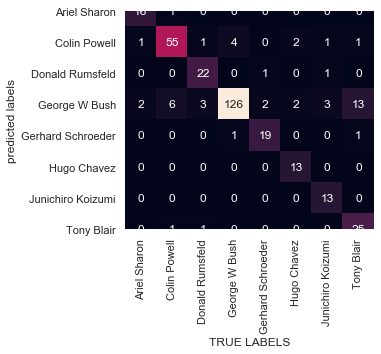

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

mat = confusion_matrix(ytest,yfit)
sns.heatmap(mat.T , square=True, annot=True , fmt='d' ,cbar=False,
           xticklabels=faces.target_names,
           yticklabels=faces.target_names);
plt.xlabel("TRUE LABELS");
plt.ylabel("predicted labels");
clf.pridict

#below is the confusion matrix overlay with heat map using Seaborn module.
